## Gradient Descent and Backpropagation

In this assignment, we will learn about gradient descent and backpropagation algorithms. We will create a neural network and tweak some of the parameters in SGD.

In [ ]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Let's use the data we processed in the titanic assigment and load it below.

In [ ]:
titanic = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic_processed.csv')

In [ ]:
titanic.head()

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,0,1,0,1,0,0,1
1,1,1,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,1
3,1,1,0,1,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,1,0,0,1


Split the data into train and test with 20% of data in test.

In [ ]:
# Answer below
from sklearn.model_selection import train_test_split

y = titanic.Survived
X = titanic.drop(columns='Survived')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Create a model with 5 layers - The first layer should be of unit size 128 and input shape with the shape of the input and the last layer should be of size 1. The hidden layers should be of size 64, 32, and 32, respectively. Use a sigmoid activation.

In [ ]:
# Answer below
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

def five_layer_model(epochs, batch_size, learning_rate):
  model = Sequential()
  sgd = SGD(learning_rate=learning_rate)
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

  model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer=sgd, metrics='accuracy')
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[es])
  model_df = pd.DataFrame(history.history)
  ax=model_df[['accuracy', 'val_accuracy', 'loss', 'val_loss']].plot(figsize=(15,10))
  model.evaluate(X_test, y_test)[1]


Initialize an SGD optimizer with learning rate 0.05. Note that in older versions of keras, we use `lr` instead of `learning_rate`.

compile and fit the model using the optimizer you initialized above. Use a batch size of 100 and 50 epochs

Epoch 1/50
8/8 [==============================] - 1s 43ms/step - loss: 0.6735 - accuracy: 0.6168 - val_loss: 0.6507 - val_accuracy: 0.6348
Epoch 2/50
8/8 [==============================] - 0s 11ms/step - loss: 0.6494 - accuracy: 0.6307 - val_loss: 0.6354 - val_accuracy: 0.6348
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6334 - accuracy: 0.6220 - val_loss: 0.6221 - val_accuracy: 0.6348
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 0.6296 - accuracy: 0.6063 - val_loss: 0.6145 - val_accuracy: 0.6348
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 0.6112 - accuracy: 0.6297 - val_loss: 0.6020 - val_accuracy: 0.6348
Epoch 6/50
8/8 [==============================] - 0s 11ms/step - loss: 0.6049 - accuracy: 0.6107 - val_loss: 0.5890 - val_accuracy: 0.6348
Epoch 7/50
8/8 [==============================] - 0s 11ms/step - loss: 0.5830 - accuracy: 0.6224 - val_loss: 0.5773 - val_accuracy: 0.6685
Epoch 8/50
8/8 [===========

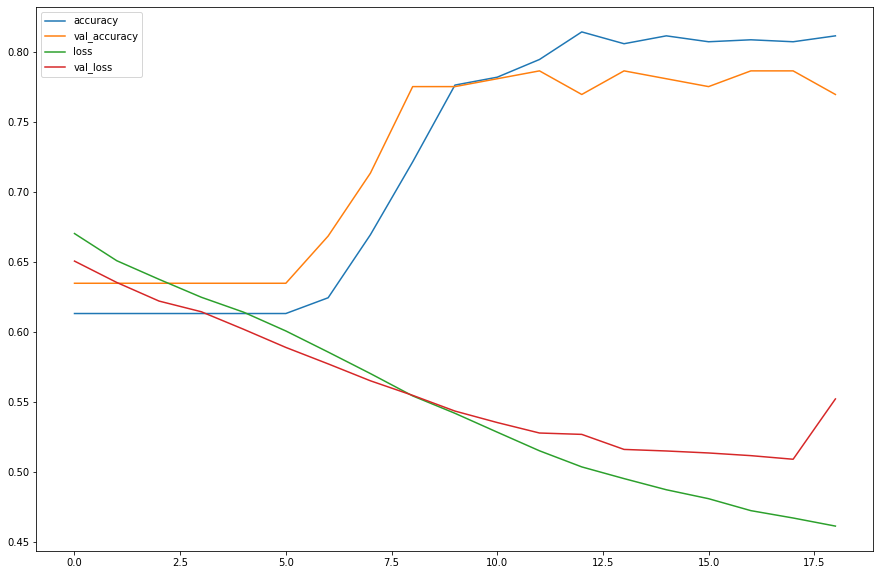

In [ ]:
# Answer below:
import time
start_time = time.time()
five_layer_model(50, 100, 0.05)
print("--- %s seconds ---" % (time.time() - start_time))

Now use the same batch size, but fit your model using 500 epochs. Is there a difference in performance?

Epoch 1/500
8/8 [==============================] - 1s 42ms/step - loss: 0.6753 - accuracy: 0.6316 - val_loss: 0.6603 - val_accuracy: 0.6348
Epoch 2/500
8/8 [==============================] - 0s 11ms/step - loss: 0.6593 - accuracy: 0.6033 - val_loss: 0.6417 - val_accuracy: 0.6348
Epoch 3/500
8/8 [==============================] - 0s 12ms/step - loss: 0.6400 - accuracy: 0.6171 - val_loss: 0.6267 - val_accuracy: 0.6348
Epoch 4/500
8/8 [==============================] - 0s 12ms/step - loss: 0.6187 - accuracy: 0.6265 - val_loss: 0.6143 - val_accuracy: 0.6348
Epoch 5/500
8/8 [==============================] - 0s 12ms/step - loss: 0.6060 - accuracy: 0.6346 - val_loss: 0.6005 - val_accuracy: 0.6348
Epoch 6/500
8/8 [==============================] - 0s 12ms/step - loss: 0.6031 - accuracy: 0.6175 - val_loss: 0.5862 - val_accuracy: 0.6517
Epoch 7/500
8/8 [==============================] - 0s 11ms/step - loss: 0.5836 - accuracy: 0.6671 - val_loss: 0.5743 - val_accuracy: 0.7697
Epoch 8/500
8/8 [===

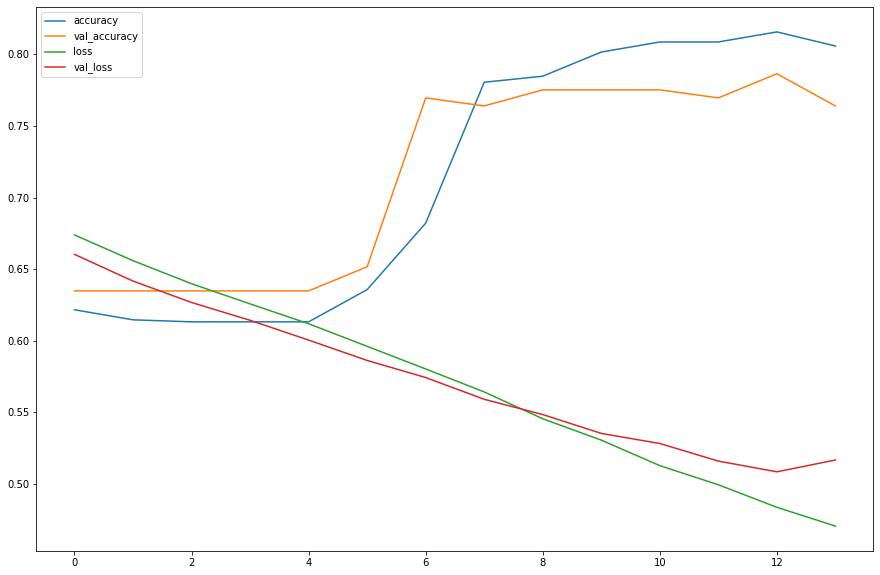

In [ ]:
# Answer below:
five_layer_model(500, 100, 0.05)

Now use a batch size of 200 and 200 epochs. Have you observed a significant difference in performance?

Epoch 1/200
4/4 [==============================] - 1s 193ms/step - loss: 0.6757 - accuracy: 0.5935 - val_loss: 0.6621 - val_accuracy: 0.6348
Epoch 2/200
4/4 [==============================] - 0s 29ms/step - loss: 0.6610 - accuracy: 0.6138 - val_loss: 0.6521 - val_accuracy: 0.6348
Epoch 3/200
4/4 [==============================] - 0s 25ms/step - loss: 0.6451 - accuracy: 0.6315 - val_loss: 0.6428 - val_accuracy: 0.6348
Epoch 4/200
4/4 [==============================] - 0s 25ms/step - loss: 0.6424 - accuracy: 0.6095 - val_loss: 0.6342 - val_accuracy: 0.6348
Epoch 5/200
4/4 [==============================] - 0s 27ms/step - loss: 0.6319 - accuracy: 0.6146 - val_loss: 0.6271 - val_accuracy: 0.6348
Epoch 6/200
4/4 [==============================] - 0s 26ms/step - loss: 0.6255 - accuracy: 0.6156 - val_loss: 0.6200 - val_accuracy: 0.6348
Epoch 7/200
4/4 [==============================] - 0s 23ms/step - loss: 0.6175 - accuracy: 0.6191 - val_loss: 0.6138 - val_accuracy: 0.6348
Epoch 8/200
4/4 [==

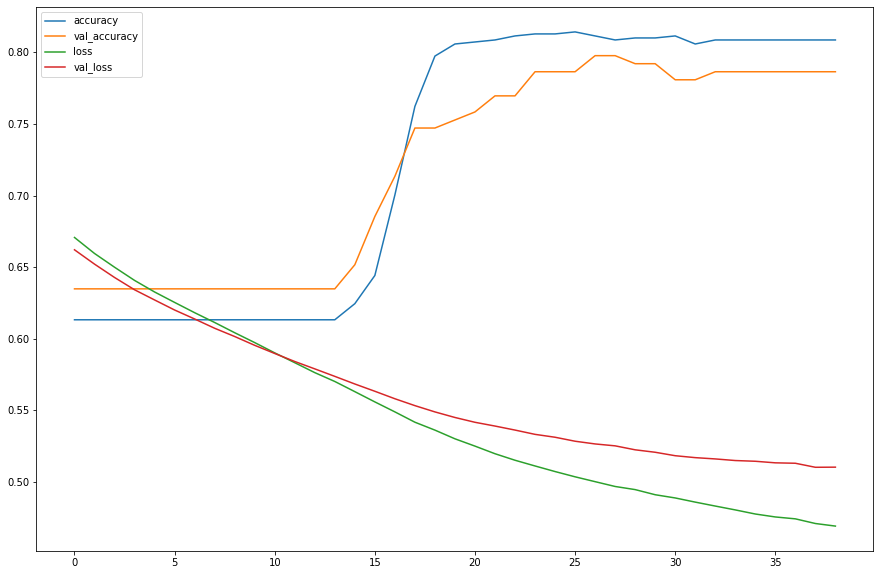

In [ ]:
# Answer below:
five_layer_model(200, 200, 0.05)

Now create a model with 7 layers. The model should have an input layer with unit size 128, then hidden layers of size 128, 64, 64, 32, 32, and an output layer of size 1. Use a sigmoid activation.

In [ ]:
# Answer below
def seven_layer_model(epochs, batch_size, learning_rate):
  model = Sequential()
  sgd = SGD(learning_rate=learning_rate)
  es = EarlyStopping(monitor='val_loss', verbose=1)

  model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[es])
  model_df = pd.DataFrame(history.history)
  ax=model_df[['accuracy', 'val_accuracy', 'loss', 'val_loss']].plot(figsize=(15,10))

Fit and compile the model using the SGD optimizer you previously defined, batch size = 80 and epochs = 200

Epoch 1/200
9/9 [==============================] - 1s 39ms/step - loss: 0.6824 - accuracy: 0.5992 - val_loss: 0.6634 - val_accuracy: 0.6348
Epoch 2/200
9/9 [==============================] - 0s 11ms/step - loss: 0.6627 - accuracy: 0.6133 - val_loss: 0.6472 - val_accuracy: 0.6348
Epoch 3/200
9/9 [==============================] - 0s 13ms/step - loss: 0.6532 - accuracy: 0.6005 - val_loss: 0.6345 - val_accuracy: 0.6348
Epoch 4/200
9/9 [==============================] - 0s 11ms/step - loss: 0.6320 - accuracy: 0.6174 - val_loss: 0.6226 - val_accuracy: 0.6348
Epoch 5/200
9/9 [==============================] - 0s 11ms/step - loss: 0.6212 - accuracy: 0.6170 - val_loss: 0.6089 - val_accuracy: 0.6348
Epoch 6/200
9/9 [==============================] - 0s 36ms/step - loss: 0.6083 - accuracy: 0.6150 - val_loss: 0.5943 - val_accuracy: 0.6348
Epoch 7/200
9/9 [==============================] - 0s 10ms/step - loss: 0.5843 - accuracy: 0.6116 - val_loss: 0.5781 - val_accuracy: 0.6348
Epoch 8/200
9/9 [===

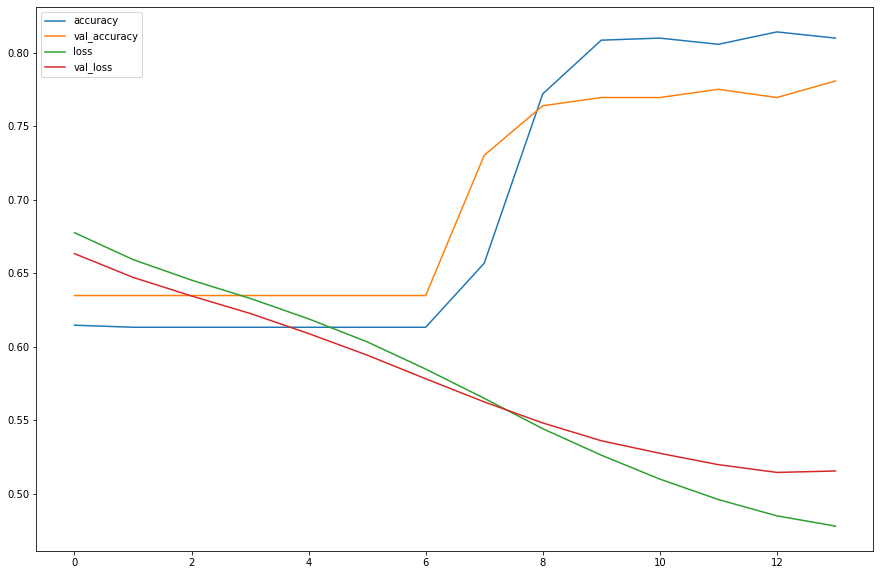

In [ ]:
# Answer below:
seven_layer_model(200, 80, 0.05)

Define a new SGD optimizer with a learning rate of 0.001

Fit and compile the model using this SGD optimizer, batch size = 80 and epochs = 200. Compare to previous results. What do you think went wrong and why?

Epoch 1/200
9/9 [==============================] - 1s 37ms/step - loss: 0.6982 - accuracy: 0.3237 - val_loss: 0.6978 - val_accuracy: 0.2753
Epoch 2/200
9/9 [==============================] - 0s 10ms/step - loss: 0.6967 - accuracy: 0.3467 - val_loss: 0.6970 - val_accuracy: 0.2865
Epoch 3/200
9/9 [==============================] - 0s 11ms/step - loss: 0.6962 - accuracy: 0.3420 - val_loss: 0.6963 - val_accuracy: 0.3764
Epoch 4/200
9/9 [==============================] - 0s 12ms/step - loss: 0.6955 - accuracy: 0.3787 - val_loss: 0.6956 - val_accuracy: 0.3708
Epoch 5/200
9/9 [==============================] - 0s 13ms/step - loss: 0.6948 - accuracy: 0.4139 - val_loss: 0.6949 - val_accuracy: 0.3820
Epoch 6/200
9/9 [==============================] - 0s 11ms/step - loss: 0.6943 - accuracy: 0.4636 - val_loss: 0.6941 - val_accuracy: 0.5899
Epoch 7/200
9/9 [==============================] - 0s 12ms/step - loss: 0.6943 - accuracy: 0.5920 - val_loss: 0.6934 - val_accuracy: 0.5843
Epoch 8/200
9/9 [===

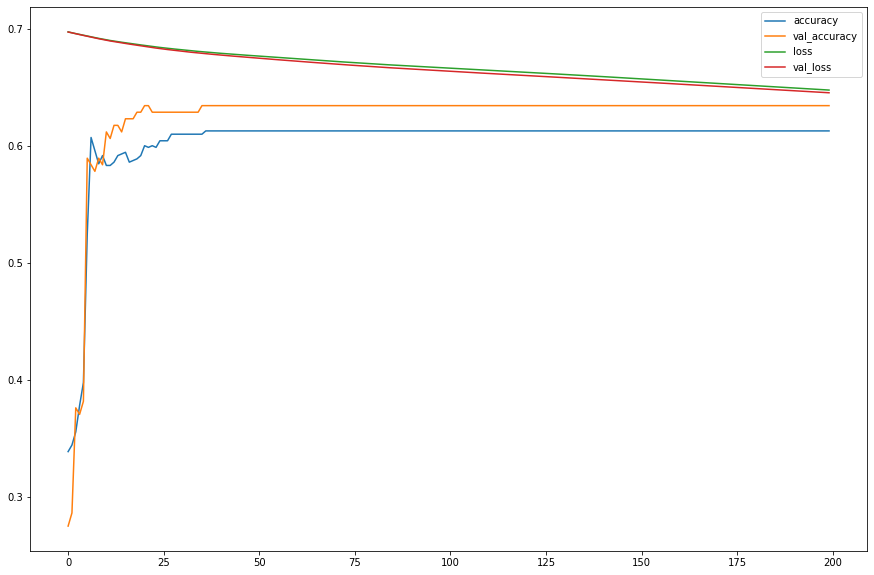

In [ ]:
# Answer below:
seven_layer_model(200, 80, 0.001)

Look at the prediction for the training and test data. Print the confusion matrix for the test data.

In [ ]:
  model = Sequential()
  sgd = SGD(learning_rate=0.001)
  #es = EarlyStopping(monitor='val_loss', verbose=1)

  model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=200, batch_size=80, validation_data=(X_test, y_test), verbose=0) #callbacks=[es])

In [ ]:
model.predict(X_test).flatten()

array([0.39601302, 0.4361911 , 0.4087926 , 0.45978132, 0.4138832 ,
       0.4115516 , 0.3559783 , 0.36603552, 0.3559783 , 0.42487133,
       0.3918788 , 0.3559783 , 0.4257245 , 0.46185458, 0.42833006,
       0.45915845, 0.36603552, 0.3559783 , 0.39003983, 0.4071562 ,
       0.3559783 , 0.36603552, 0.3559783 , 0.3559783 , 0.3559783 ,
       0.4612937 , 0.33023208, 0.40108746, 0.4530746 , 0.39761713,
       0.3514325 , 0.39003983, 0.3559783 , 0.4115516 , 0.33541846,
       0.36461633, 0.4115516 , 0.36603552, 0.36603552, 0.42637902,
       0.36461633, 0.3559783 , 0.4257245 , 0.46185458, 0.3559783 ,
       0.46724764, 0.3559783 , 0.34500447, 0.4115516 , 0.43719238,
       0.35666215, 0.39884296, 0.3559783 , 0.40108746, 0.46185458,
       0.4115516 , 0.35666215, 0.3559783 , 0.4454071 , 0.3559783 ,
       0.3559783 , 0.3559783 , 0.36416107, 0.46706396, 0.3559783 ,
       0.37368137, 0.3559783 , 0.3559783 , 0.3559783 , 0.46706393,
       0.36603552, 0.3559783 , 0.4138832 , 0.3559783 , 0.41155

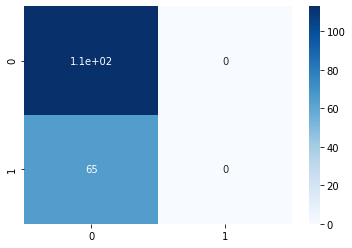

In [ ]:
# Answer below:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(X_test).flatten

y_test_pred = pd.Series((model.predict(X_test) > 0.5).flatten().astype("int32"))

cm = confusion_matrix(y_test, y_test_pred)
ax=sns.heatmap(cm, annot=True, cmap='Blues')